# Project Name: Text Mining - Stock Market Prediction

### Predicting stock market movement from news text

## Ahmed Abdelazeem

- In this notebook, the performance of MLP is tested for both TF-IDF vectores and Word2Vec embedding using Google News corpus
- We conclude that performance of MLP with hidden layers (25, 10) on TF-IDF performs fairly well, given the size of the dataset we have, with an accuracy of 55% and a Balanced Precision of 61%

# Data Import

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as plty
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np
from sklearn.metrics import classification_report


In [327]:
df_train = pd.read_csv('train.csv', index_col=0 )
df_test = pd.read_csv('test.csv', index_col=0)


In [328]:
df_train.head(1)

,Closing Status,Headline1,Headline2,Headline3,Headline4,Headline5,Headline6,Headline7,Headline8,Headline9,...,Headline16,Headline17,Headline18,Headline19,Headline20,Headline21,Headline22,Headline23,Headline24,Headline25
Id,,,,,,,,,,,,,,,,,,,,,
0,1,Milan court convicts Berlusconi of tax evasion...,Suicide bomber kills 20 in Afghan mosque,"After the biggest double dip since WW2, the UK...",Billions in Hidden Riches for Family of Chines...,Former Italian Prime Minister Silvio Berluscon...,"Through Her Sister's Eyes -- ""This seemingly m...",UN to investigate civilian deaths from US dron...,Ben Goldacre: Closed drug trials leave patient...,The U.K. thinks a strike on Iran would be ille...,...,Britain rejects US request to use UK bases in ...,New York Times blocked in China over Wen Jiaba...,What Are the Odds That Israel Just Attacked Su...,Opinion poll shows 43% of French people see Is...,New York Times blocked by China after report o...,The British government opposed the establishme...,"Ashok Khemka, a bureaucrat in India, has been ...",Malala's parents overjoyed after first visit i...,"A victory for self-defence, but only a partial...",British ExxonMobil oil chief 'assassinated' in...


In [329]:
df_test.head(1)

,Headline1,Headline2,Headline3,Headline4,Headline5,Headline6,Headline7,Headline8,Headline9,Headline10,...,Headline16,Headline17,Headline18,Headline19,Headline20,Headline21,Headline22,Headline23,Headline24,Headline25
Id,,,,,,,,,,,,,,,,,,,,,
0,China cyber probes show electronic warfare foc...,More pupils than expected in 'illegal schools'...,"Police sealed off a hotel in Ankara on Sunday,...","Car fires turning into a Dutch plague, 100s to...",Magnitude 5.6 / Shindo 5 earthquake shakes Iba...,Police in Colombia seize more than 8 tons of c...,Google (GOOGL.O) faces a record antitrust fine...,China waging war against ancient superstitions...,Erdoan pictured as Hitler on Turkish Embassy i...,India successfully test-fires indigenously dev...,...,An online al Qaeda magazine is calling for jih...,North Korea releases Russian yacht - detention...,Duterte vows to kill criminals and reintroduce...,"Venezuelan President decrees emergency, seizes...",Luxembourg prosecutors seek jail time for whis...,"Al Qaeda Turns to Syria, With a Plan to Challe...",Iran is arresting models who pose without head...,Scientists Seek To Bring Dead Brains Back To Life,Former CIA agent admits involvment in Nelson M...,New move to impeach Tony Blair over Iraq War g...


In [330]:
# Combining the headlines into one column - Train
headlines_train = []
for row in range(0,len(df_train.index)):
    headlines_train.append(' '.join(str(x) for x in df_train.iloc[row,1:26]))

In [331]:
df_train.drop(axis=1, labels=df_train.columns.to_list()[1::], inplace=True)
df_train['Headlines'] = headlines_train

In [332]:
df_train.head(1)

,Closing Status,Headlines
Id,,
0,1,Milan court convicts Berlusconi of tax evasion...


In [333]:
# Combining the headlines into one column - Test
headlines_test = []
for row in range(0,len(df_test.index)):
    headlines_test.append(' '.join(str(x) for x in df_test.iloc[row,0::]))

In [334]:
df_test.drop(axis=1, labels=df_test.columns.to_list()[0::], inplace=True)
df_test['Headlines'] = headlines_test
df_test.head(1)

,Headlines
Id,
0,China cyber probes show electronic warfare foc...


# Data Exploration

In [335]:
df_train['Closing Status'].value_counts()
# Data seems fairly balanced, which is good, no undefined values, just binary outcomes

1    902
0    788
Name: Closing Status, dtype: int64

In [336]:
df_train.duplicated().sum()
# No duplicates noted

0

In [337]:
df_train['Closing Status'].isna().sum()

0

In [338]:
df_train['Closing Status'].describe()

count    1690.000000
mean        0.533728
std         0.499009
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Closing Status, dtype: float64

<Axes: >

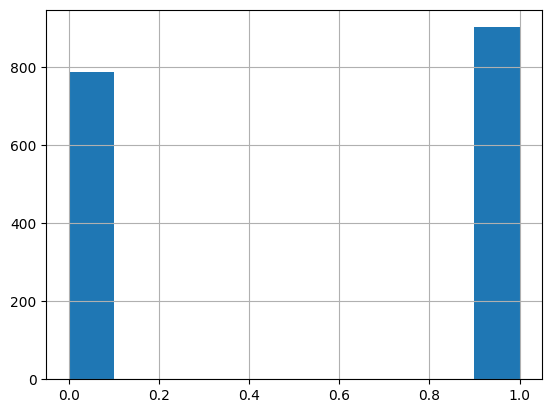

In [339]:
df_train['Closing Status'].hist()

## Text (Independent features)

In [340]:
df_train['Headlines'].isna().sum()
# No NAs in train text data

0

In [341]:
df_train['Headlines'].duplicated().sum()
# No duplicates in train text data

0

In [342]:
## Word Count
# Fetch wordcount for each abstract
df_train['word_count']  = df_train['Headlines'].apply(lambda x: len(str(x).split(" ")))
df_train[['Headlines','word_count']].head()

,Headlines,word_count
Id,,
0,Milan court convicts Berlusconi of tax evasion...,601
1,Iraq Police Training: $200 Million Wasted On P...,512
2,"Al Shabaab kidnaps, interrogates new Somali mi...",312
3,Sweden With Entitlements &amp; Health Care Sur...,543
4,FIFA has banned Croatian defender Josip Simuni...,547


<Axes: >

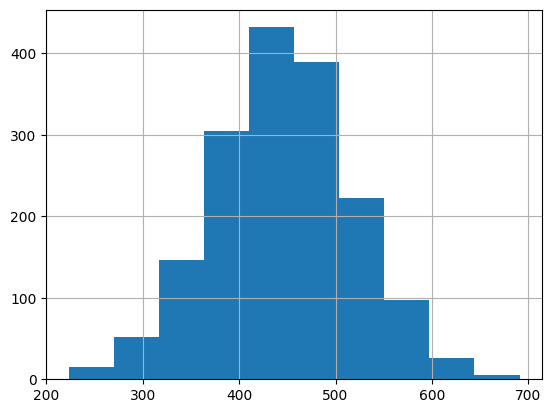

In [343]:
df_train['word_count'].hist()
# Distribution seems to be normally distributed

In [344]:
all_words = ' '.join(df_train['Headlines']).split()

In [345]:
freq = pd.Series(all_words).value_counts()

In [346]:
freq.sort_values(ascending=False)[0:10]

the    23031
to     21858
of     19192
in     18501
a      11939
and    10511
for     7700
on      6419
is      5213
-       4232
dtype: int64

In [347]:
freq.index[0:10]
# as expected. most common words are stopwords

Index(['the', 'to', 'of', 'in', 'a', 'and', 'for', 'on', 'is', '-'], dtype='object')

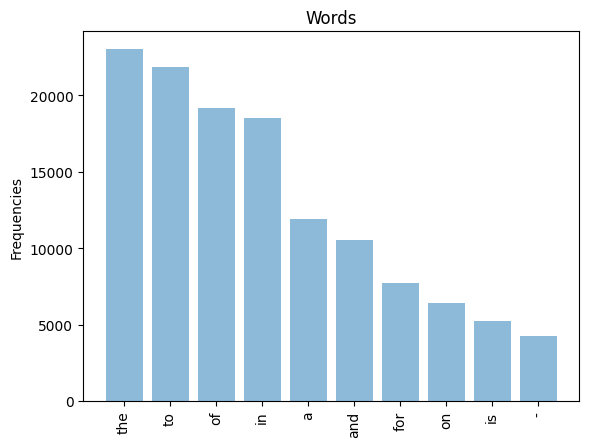

In [348]:
x_labels = freq.index[0:10]
values = freq[:10]
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

In [349]:
df_train.drop(axis=1, labels='word_count', inplace=True)

In [350]:
# Corpus split
X_train, X_test, Y_train, Y_test = train_test_split(df_train['Headlines'], df_train['Closing Status'], test_size=0.20, random_state=4)

In [351]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(1352, 338, 1352, 338)

# Data Preprocessing

In [352]:
stop = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemma = WordNetLemmatizer()

In [353]:
X_train_ = X_train.copy()

In [354]:
from tqdm import tqdm
def clean(text_list):

    updates = []

    for j in tqdm(text_list):

        text = j

        #LOWERCASE TEXT
        text = text.lower()

        #REMOVE NUMERICAL DATA and PUNCTUATION
        text = re.sub("[^a-zA-Z]"," ", text )
        text = re.sub("br", "", text)
        text = re.sub("\\b\\w\\b","", text) #remove single letter words

        #REMOVE STOPWORDS
        text = " ".join([word for word in text.split() if word not in stop])

        #Lemmatize
        text = " ".join(lemma.lemmatize(word) for word in text.split())

        # Remove words with one character
       # text = [word.replace('b', '') for word in text.split()]

        #Stemming
        #if stemmer:
        #    text = " ".join(stemmer.stem(word) for word in text.split())

        updates.append(text)

    return updates

In [355]:
# Stemming technique was discarded as it distorted the meaning of many significant words
# A further adjustment was carried out using Regular Expressions to remove single letter words
# Reference: https://stackoverflow.com/questions/26360654/how-to-select-a-word-only-with-single-character-using-regex

In [356]:
x_train = clean(X_train)

 72%|███████▏  | 976/1352 [00:02<00:00, 437.47it/s]

100%|██████████| 1352/1352 [00:03<00:00, 342.55it/s]


In [357]:
x_test = clean(X_test)

100%|██████████| 338/338 [00:00<00:00, 486.64it/s]


In [358]:
y_train = Y_train.to_numpy()

In [359]:
y_test = Y_test.to_numpy()

# Feature Engineering

## TF-IDF

In [360]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [361]:
tfidf = TfidfVectorizer(max_df=0.8, ngram_range=(1,2))

### Train

In [362]:
X = tfidf.fit_transform(x_train).toarray()
X.shape

(1352, 321152)

In [363]:
y = y_train
y

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

### Test

In [364]:
x_test = tfidf.transform(x_test).toarray()

In [365]:
y_test = y_test

# Dimensionality reduction

In [366]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components=25, random_state=1)

# Fit LSA on the training data and transform it
X_lsa = lsa.fit_transform(X)

# Transform the test data with the same LSA model
x_test_lsa = lsa.transform(x_test)


# Model

## Multilayer Perceptron - ANN (TF-IDF)

In [374]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    solver='adam',           # Good for large datasets; should consider 'lbfgs' as well
    hidden_layer_sizes=(25,10),  # Increase the size and number of layers
    activation='relu',       # Recommended for deep networks
    random_state=1,          # For reproducibility
    max_iter=100            # Increase the number of iterations if the training hasn't converged
)


mlp.fit(X_lsa,y)

# Assuming X_test is defined
preds = mlp.predict(x_test_lsa) # Probabilities for class 1 from mlp_class1


In [368]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.69      0.07      0.13       158
           1       0.54      0.97      0.70       180

    accuracy                           0.55       338
   macro avg       0.62      0.52      0.41       338
weighted avg       0.61      0.55      0.43       338



# Multilayer Perceptron - (Word2Vec Embeddings)

In [369]:
# Step 1: Install Gensim and NLTK, and import necessary modules
!pip install gensim
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from gensim.models import KeyedVectors

# Step 2: Tokenize your text data
# Assuming 'X_train' and 'X_test' are lists of sentences
x_train_tokenized = [word_tokenize(text.lower()) for text in X_train]
x_test_tokenized = [word_tokenize(text.lower()) for text in X_test]

# Step 3: Load the pretrained Word2Vec model from Google News
# Note: The path to 'GoogleNews-vectors-negative300.bin' will need to be adjusted based on where you've stored the model file.
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# Step 4: Define a function to create document vectors by averaging word vectors
import numpy as np
def document_vector(doc, model):
    # Filter words to ensure they are in the model's vocabulary
    doc = [word for word in doc if word in model.key_to_index]
    # Compute the mean of the vectors for all words in the document that are found in the model's vocabulary
    return np.mean(model[doc], axis=0) if doc else np.zeros(model.vector_size)

# Step 5: Vectorize your documents using the defined function
# This transforms each document into a single vector by averaging its word vectors
X_train_vectors = np.array([document_vector(doc, model) for doc in x_train_tokenized])
X_test_vectors = np.array([document_vector(doc, model) for doc in x_test_tokenized])


You should consider upgrading via the 'C:\Users\ahmed\Python310\python.exe -m pip install --upgrade pip' command.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [370]:
# Fit LSA on the training data and transform it
X_lsa = lsa.fit_transform(X_train_vectors)

# Transform the test data with the same LSA model
x_test_lsa = lsa.transform(X_test_vectors)


In [371]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    solver='adam',           # Good for large datasets; should consider 'lbfgs' as well
    hidden_layer_sizes=(25,10),  # Increase the size and number of layers
    activation='relu',       # Recommended for deep networks
    random_state=1,          # For reproducibility
    max_iter=100            # Increase the number of iterations if the training hasn't converged
)

mlp.fit(X_lsa,y)

# Assuming X_test is defined
preds = mlp.predict(x_test_lsa) # Probabilities for class 1 from mlp_class1


In [372]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       158
           1       0.53      1.00      0.69       180

    accuracy                           0.53       338
   macro avg       0.27      0.50      0.35       338
weighted avg       0.28      0.53      0.37       338



c:\Users\ahmed\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmed\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmed\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conclusion

- In this notebook, the performance of MLP is tested for both TF-IDF vectores and Word2Vec embedding using Google News corpus
- We conclude that performance of MLP with hidden layers (25, 10) on TF-IDF performs fairly well, given the size of the dataset we have, with an accuracy of 55% and a Balanced Precision of 61%